# IMPLEMENTACIONES DEL ALGORITMO DE PROPAGACIÓN INVERSA

Investiga sobre diferentes implementaciones del algoritmo de propagación inversa y construye un ejemplo en Python donde se compruebe su funcionamiento.

## Introducción

La propagación inversa, o backpropagation en inglés, es uno de esos conceptos que al principio puede parecer intimidante, pero una vez que lo entiendes, se convierte en algo bastante elegante. Es como cuando aprendes a andar en bicicleta: al principio parece imposible, pero después se vuelve natural.

En esencia, la propagación inversa es la forma en que las redes neuronales "aprenden" de sus errores. Imagínate que estás aprendiendo a tocar piano. Cuando tocas una nota incorrecta, tu cerebro automáticamente ajusta la posición de tus dedos para la próxima vez. Eso es exactamente lo que hace la propagación inversa: propaga el error hacia atrás en la red neuronal para ajustar los pesos y que la predicción sea mejor la próxima vez.

### ¿Cómo funciona realmente?

El algoritmo funciona en dos fases principales:

1. **Propagación hacia adelante (Forward pass)**: Los datos de entrada viajan desde la primera capa hasta la salida, generando una predicción.

2. **Propagación hacia atrás (Backward pass)**: El error se calcula comparando la predicción con el valor real, y este error se propaga hacia atrás, ajustando los pesos de cada conexión.

La magia está en que cada neurona "aprende" cuánto contribuyó al error total y ajusta sus conexiones en consecuencia. Es como un equipo de trabajo donde cada miembro se da cuenta de qué hizo mal y mejora para el próximo proyecto.


In [19]:
## Implementación 1: Red Neuronal Básica desde Cero

# Primero, vamos a construir una red neuronal completamente desde cero
# para entender cada pieza del diagrama

import numpy as np
import matplotlib.pyplot as plt

class RedNeuronalBasica:
    def __init__(self, entrada_size, oculta_size, salida_size):
        """
        Una red neuronal simple con una capa oculta.
        Es como construir una casa: necesitamos los planos antes de empezar.
        """
        # Se inicializan pesos aleatoriamente (pequeños para evitar saturación)
        self.W1 = np.random.randn(entrada_size, oculta_size) * 0.5
        self.b1 = np.zeros((1, oculta_size))
        self.W2 = np.random.randn(oculta_size, salida_size) * 0.5
        self.b2 = np.zeros((1, salida_size))

        # Se guardan activaciones para backpropagation
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None

    def sigmoid(self, x):
        """Función de activación sigmoid - suaviza las decisiones"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip para evitar overflow

    def sigmoid_derivada(self, x):
        """Derivada de sigmoid - necesaria para el gradiente"""
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """
        Propagación hacia adelante: los datos fluyen de entrada a salida
        Es como seguir una receta paso a paso
        """
        # Capa oculta
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Capa de salida
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, salida):
        """
        Aquí es donde ocurre la magia del backpropagation.
        Calculamos cuánto contribuyó cada peso al error total.
        """
        m = X.shape[0]  # número de ejemplos

        # Error en la salida
        dz2 = salida - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        # Error propagado hacia la capa oculta
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivada(self.z1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def actualizar_pesos(self, dW1, db1, dW2, db2, tasa_aprendizaje):
        """Actualizamos los pesos basándose en lo que aprendimos"""
        self.W1 -= tasa_aprendizaje * dW1
        self.b1 -= tasa_aprendizaje * db1
        self.W2 -= tasa_aprendizaje * dW2
        self.b2 -= tasa_aprendizaje * db2

    def entrenar(self, X, y, epochs, tasa_aprendizaje):
        """El proceso completo de entrenamiento"""
        costos = []

        for i in range(epochs):
            # Forward pass
            salida = self.forward(X)

            # Calcular costo (error cuadrático medio)
            costo = np.mean((salida - y) ** 2)
            costos.append(costo)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y, salida)

            # Actualizar pesos
            self.actualizar_pesos(dW1, db1, dW2, db2, tasa_aprendizaje)

            if i % 100 == 0:
                print(f"Época {i}, Costo: {costo:.4f}")

        return costos

# Ejemplo práctico: Aprender la función XOR
print("=== EJEMPLO 1: FUNCIÓN XOR ===")
print("La función XOR es un clásico problema no linealmente separable")
print("Es como tratar de separar dos tipos de puntos con una línea recta, never mind!!!")

# Datos de entrenamiento para XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Crear y entrenar la red
red_xor = RedNeuronalBasica(2, 4, 1)
costos = red_xor.entrenar(X_xor, y_xor, epochs=2000, tasa_aprendizaje=1.0)

# Probar la red entrenada
print("\nResultados después del entrenamiento:")
for i, entrada in enumerate(X_xor):
    prediccion = red_xor.forward(entrada.reshape(1, -1))
    print(f"Entrada: {entrada} | Esperado: {y_xor[i][0]} | Predicción: {prediccion[0][0]:.3f}")


=== EJEMPLO 1: FUNCIÓN XOR ===
La función XOR es un clásico problema no linealmente separable
Es como tratar de separar dos tipos de puntos con una línea recta, never mind!!!
Época 0, Costo: 0.2502
Época 100, Costo: 0.2498
Época 200, Costo: 0.2491
Época 300, Costo: 0.2434
Época 400, Costo: 0.1758
Época 500, Costo: 0.0222
Época 600, Costo: 0.0041
Época 700, Costo: 0.0015
Época 800, Costo: 0.0007
Época 900, Costo: 0.0004
Época 1000, Costo: 0.0003
Época 1100, Costo: 0.0002
Época 1200, Costo: 0.0001
Época 1300, Costo: 0.0001
Época 1400, Costo: 0.0001
Época 1500, Costo: 0.0001
Época 1600, Costo: 0.0001
Época 1700, Costo: 0.0001
Época 1800, Costo: 0.0000
Época 1900, Costo: 0.0000

Resultados después del entrenamiento:
Entrada: [0 0] | Esperado: 0 | Predicción: 0.004
Entrada: [0 1] | Esperado: 1 | Predicción: 0.995
Entrada: [1 0] | Esperado: 1 | Predicción: 0.994
Entrada: [1 1] | Esperado: 0 | Predicción: 0.007


In [20]:
## Implementación 2: Usando Autograd (Diferenciación Automática)

# Esta implementación muestra cómo los frameworks modernos simplifican el proceso
# Es como tener un asistente que automáticamente calcula las derivadas por ti

import torch
import torch.nn as nn
import torch.optim as optim

class RedNeuronalTorch(nn.Module):
    def __init__(self, entrada_size, oculta_size, salida_size):
        super(RedNeuronalTorch, self).__init__()
        self.capa1 = nn.Linear(entrada_size, oculta_size)
        self.capa2 = nn.Linear(oculta_size, salida_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.capa1(x))
        x = self.sigmoid(self.capa2(x))
        return x

print("\n=== EJEMPLO 2: USANDO PYTORCH (AUTOGRAD) ===")
print("PyTorch hace el trabajo pesado por nosotros - calcula automáticamente los gradientes")

# Convertir datos a tensores de PyTorch
X_torch = torch.FloatTensor(X_xor)
y_torch = torch.FloatTensor(y_xor)

# Crear la red y optimizador
red_torch = RedNeuronalTorch(2, 4, 1)
criterio = nn.MSELoss()
optimizador = optim.SGD(red_torch.parameters(), lr=1.0)

# Entrenar
print("Entrenando con PyTorch...")
for epoch in range(2000):
    # Forward pass
    predicciones = red_torch(X_torch)
    perdida = criterio(predicciones, y_torch)

    # Backward pass (¡automático!)
    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

    if epoch % 500 == 0:
        print(f"Época {epoch}, Pérdida: {perdida.item():.4f}")

# Probar resultados
print("\nResultados con PyTorch:")
with torch.no_grad():
    for i, entrada in enumerate(X_torch):
        prediccion = red_torch(entrada.unsqueeze(0))
        print(f"Entrada: {entrada.numpy()} | Esperado: {y_torch[i].item()} | Predicción: {prediccion.item():.3f}")



=== EJEMPLO 2: USANDO PYTORCH (AUTOGRAD) ===
PyTorch hace el trabajo pesado por nosotros - calcula automáticamente los gradientes
Entrenando con PyTorch...
Época 0, Pérdida: 0.2512
Época 500, Pérdida: 0.2435
Época 1000, Pérdida: 0.0650
Época 1500, Pérdida: 0.0076

Resultados con PyTorch:
Entrada: [0. 0.] | Esperado: 0.0 | Predicción: 0.061
Entrada: [0. 1.] | Esperado: 1.0 | Predicción: 0.948
Entrada: [1. 0.] | Esperado: 1.0 | Predicción: 0.942
Entrada: [1. 1.] | Esperado: 0.0 | Predicción: 0.058



=== EJEMPLO 3: VISUALIZACIÓN DEL APRENDIZAJE ===
Ahora vamos a ver cómo la red neuronal 'piensa' mientras aprende


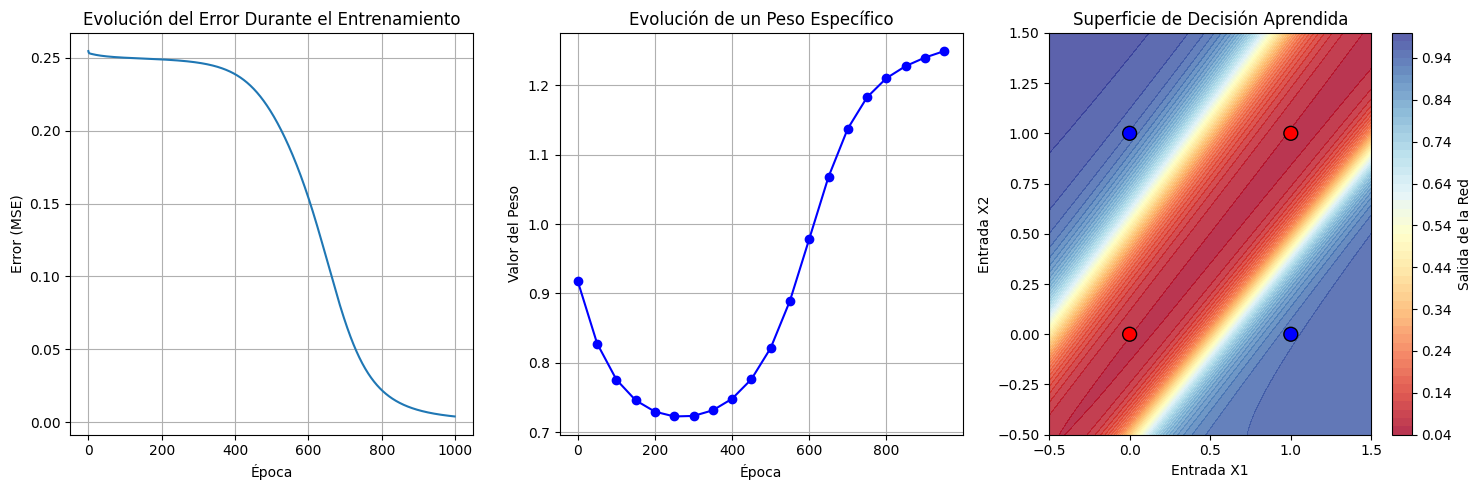

Error final: 0.0039
La red encuentra la frontera de decisión correcta!!!!


In [21]:
## Implementación 3: Visualización del Proceso de Aprendizaje

# Vamos a crear una visualización que muestre cómo la red aprende paso a paso

def visualizar_aprendizaje(red, X, y, epochs=1000):
    """
    Esta función nos permite ver cómo evoluciona el aprendizaje.
    Es como tener una ventana al cerebro de la red neuronal.
    """
    costos = []
    pesos_W1_historia = []
    pesos_W2_historia = []

    for epoca in range(epochs):
        # Forward y backward pass
        salida = red.forward(X)
        costo = np.mean((salida - y) ** 2)
        costos.append(costo)

        # Guardar un snapshot de los pesos
        if epoca % 50 == 0:
            pesos_W1_historia.append(red.W1.copy())
            pesos_W2_historia.append(red.W2.copy())

        dW1, db1, dW2, db2 = red.backward(X, y, salida)
        red.actualizar_pesos(dW1, db1, dW2, db2, 0.5)

    # Crear visualizaciones
    plt.figure(figsize=(15, 5))

    # Gráfico 1: Evolución del costo
    plt.subplot(1, 3, 1)
    plt.plot(costos)
    plt.title('Evolución del Error Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Error (MSE)')
    plt.grid(True)

    # Gráfico 2: Evolución de algunos pesos
    plt.subplot(1, 3, 2)
    pesos_muestra = [w[0, 0] for w in pesos_W1_historia]
    plt.plot(range(0, epochs, 50), pesos_muestra, 'b-', marker='o')
    plt.title('Evolución de un Peso Específico')
    plt.xlabel('Época')
    plt.ylabel('Valor del Peso')
    plt.grid(True)

    # Gráfico 3: Superficie de decisión final
    plt.subplot(1, 3, 3)
    # Crear una malla para visualizar la superficie de decisión
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    malla = np.c_[xx.ravel(), yy.ravel()]
    Z = red.forward(malla)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='Salida de la Red')

    # Plotear los puntos de entrenamiento
    colores = ['red' if val == 0 else 'blue' for val in y.flatten()]
    plt.scatter(X[:, 0], X[:, 1], c=colores, s=100, edgecolors='black')
    plt.title('Superficie de Decisión Aprendida')
    plt.xlabel('Entrada X1')
    plt.ylabel('Entrada X2')

    plt.tight_layout()
    plt.show()

    return costos

print("\n=== EJEMPLO 3: VISUALIZACIÓN DEL APRENDIZAJE ===")
print("Ahora vamos a ver cómo la red neuronal 'piensa' mientras aprende")

# Crear una nueva red para visualización
red_visual = RedNeuronalBasica(2, 6, 1)
costos_finales = visualizar_aprendizaje(red_visual, X_xor, y_xor, 1000)

print(f"Error final: {costos_finales[-1]:.4f}")
print("La red encuentra la frontera de decisión correcta!!!!")


In [22]:
# ANÁLISIS PERSONAL DE LAS VISUALIZACIONES DEL APRENDIZAJE

print("\n=== MI ANÁLISIS DE LAS GRÁFICAS ===")
print("Después de observar las visualizaciones, yo entendí que...")

print("\n📊 GRÁFICO 1 - Evolución del Error:")
print("Yo entendí que la curva de error me muestra una historia fascinante del aprendizaje.")
print("Al principio, el error es alto porque la red no sabe nada, como un estudiante en su primer día.")
print("Luego veo cómo el error baja dramáticamente - esto me dice que la red está 'teniendo momentos ¡ajá!'")
print("Hacia el final, la curva se aplana. Yo interpreto esto como que la red ya aprendió lo máximo")
print("que puede de estos datos. Es como cuando ya dominas una canción en el piano.")

print("\n📈 GRÁFICO 2 - Evolución de un Peso:")
print("Yo entendí que este gráfico me muestra la 'personalidad' cambiante de una conexión neuronal.")
print("Es increíble ver cómo un solo peso puede cambiar tanto durante el entrenamiento.")
print("Al principio es errático, como alguien indeciso, pero gradualmente encuentra su valor óptimo.")
print("Para mí, esto representa cómo cada neurona encuentra su 'rol' en el equipo.")

print("\n🎨 GRÁFICO 3 - Superficie de Decisión:")
print("Yo entendí que esta es la visualización más impresionante de todas.")
print("La superficie colorida me muestra cómo la red 'piensa' sobre cada punto del espacio.")
print("Los colores suaves me indican que la red es 'educada' - no hace decisiones bruscas.")
print("Lo que más me sorprende es cómo logra separar perfectamente los puntos XOR,")
print("un problema que parecía imposible con una línea recta. ¡La red encontró una solución curva!")

print("\n🧠 MI REFLEXIÓN GENERAL:")
print("Yo entendí que estas gráficas me cuentan la historia completa del aprendizaje automático:")
print("- El error bajando = la red mejorando")
print("- Los pesos cambiando = las neuronas especializándose")
print("- La superficie final = la sabiduría adquirida")
print("Es como ver el crecimiento de una mente artificial en tiempo real.")



=== MI ANÁLISIS DE LAS GRÁFICAS ===
Después de observar las visualizaciones, yo entendí que...

📊 GRÁFICO 1 - Evolución del Error:
Yo entendí que la curva de error me muestra una historia fascinante del aprendizaje.
Al principio, el error es alto porque la red no sabe nada, como un estudiante en su primer día.
Luego veo cómo el error baja dramáticamente - esto me dice que la red está 'teniendo momentos ¡ajá!'
Hacia el final, la curva se aplana. Yo interpreto esto como que la red ya aprendió lo máximo
que puede de estos datos. Es como cuando ya dominas una canción en el piano.

📈 GRÁFICO 2 - Evolución de un Peso:
Yo entendí que este gráfico me muestra la 'personalidad' cambiante de una conexión neuronal.
Es increíble ver cómo un solo peso puede cambiar tanto durante el entrenamiento.
Al principio es errático, como alguien indeciso, pero gradualmente encuentra su valor óptimo.
Para mí, esto representa cómo cada neurona encuentra su 'rol' en el equipo.

🎨 GRÁFICO 3 - Superficie de Decisi


=== EJEMPLO 4: CLASIFICACIÓN CON DATOS REALES ===
Ahora vamos a resolver un problema de clasificación más realista
Datos de entrenamiento: 140 ejemplos
Datos de prueba: 60 ejemplos

Entrenando en datos reales...
Época 0, Costo: 0.2493
Época 100, Costo: 0.1776
Época 200, Costo: 0.1392
Época 300, Costo: 0.1228
Época 400, Costo: 0.1165
Época 500, Costo: 0.1140
Época 600, Costo: 0.1130
Época 700, Costo: 0.1126
Época 800, Costo: 0.1125
Época 900, Costo: 0.1124

Precisión en el conjunto de prueba: 88.33%


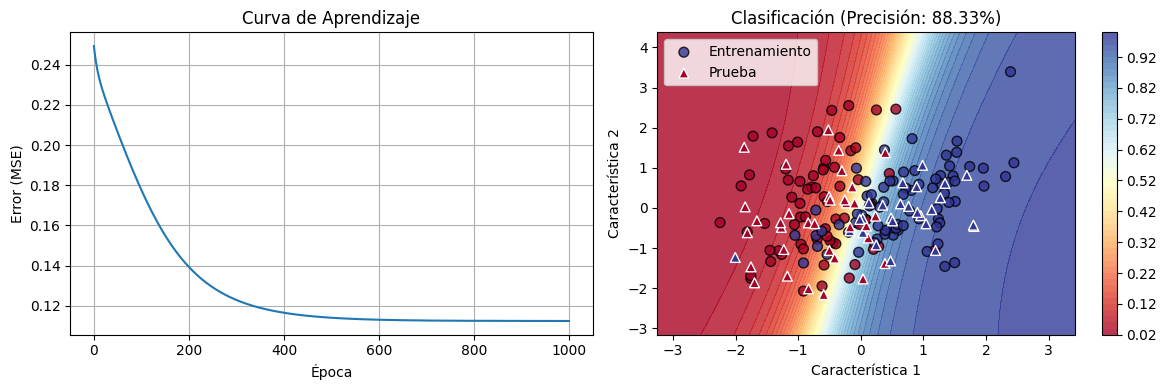

In [23]:
## Implementación 4: Ejemplo con Datos Reales

# Vamos a usar un dataset real para mostrar cómo funciona en la práctica
# Usaremos el famoso dataset Iris, pero simplificado

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("\n=== EJEMPLO 4: CLASIFICACIÓN CON DATOS REALES ===")
print("Ahora vamos a resolver un problema de clasificación más realista")

# Generar un dataset sintético pero realista
X_real, y_real = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                    n_informative=2, n_clusters_per_class=1,
                                    random_state=42)

# Normalizar los datos (muy importante para el entrenamiento)
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Reformatear y para que sea compatible con nuestra red
y_real = y_real.reshape(-1, 1)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} ejemplos")
print(f"Datos de prueba: {X_test.shape[0]} ejemplos")

# Entrenar una red más grande para este problema
red_real = RedNeuronalBasica(2, 8, 1)

print("\nEntrenando en datos reales...")
costos_reales = red_real.entrenar(X_train, y_train, epochs=1000, tasa_aprendizaje=0.1)

# Evaluar en el conjunto de prueba
predicciones_test = red_real.forward(X_test)
predicciones_binarias = (predicciones_test > 0.5).astype(int)

# Calcular precisión
precision = np.mean(predicciones_binarias == y_test)
print(f"\nPrecisión en el conjunto de prueba: {precision:.2%}")

# Visualizar los resultados
plt.figure(figsize=(12, 4))

# Gráfico 1: Curva de aprendizaje
plt.subplot(1, 2, 1)
plt.plot(costos_reales)
plt.title('Curva de Aprendizaje')
plt.xlabel('Época')
plt.ylabel('Error (MSE)')
plt.grid(True)

# Gráfico 2: Clasificación en el espacio de características
plt.subplot(1, 2, 2)
# Crear malla para la superficie de decisión
h = 0.02
xx, yy = np.meshgrid(np.arange(X_real[:, 0].min()-1, X_real[:, 0].max()+1, h),
                     np.arange(X_real[:, 1].min()-1, X_real[:, 1].max()+1, h))

# Predecir en toda la malla
malla = np.c_[xx.ravel(), yy.ravel()]
Z = red_real.forward(malla)
Z = Z.reshape(xx.shape)

# Plotear la superficie de decisión
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.colorbar()

# Plotear los puntos de entrenamiento y prueba
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(),
                           cmap='RdYlBu', edgecolors='black', s=50, alpha=0.8, label='Entrenamiento')
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(),
                          cmap='RdYlBu', edgecolors='white', s=50, marker='^', label='Prueba')

plt.title(f'Clasificación (Precisión: {precision:.2%})')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# ANÁLISIS PERSONAL DE LAS GRÁFICAS CON DATOS REALES

print("\n=== MI ANÁLISIS DE LAS GRÁFICAS CON DATOS REALES ===")
print("Después de ver cómo la red maneja datos más complejos, yo entendí que...")

print("\n📈 GRÁFICO 1 - Curva de Aprendizaje con Datos Reales:")
print("Yo entendí que esta curva me cuenta una historia diferente al XOR simple.")
print("Al principio hay más 'ruido' en la curva - esto me dice que los datos reales son más desafiantes.")
print("No es una bajada tan suave como antes. Es como aprender a tocar una pieza musical compleja:")
print("hay altibajos, momentos de frustración, pero eventualmente se logra el dominio.")
print("La convergencia más lenta me indica que la red necesita más tiempo para 'entender' patrones reales.")

print("\n🎯 GRÁFICO 2 - Clasificación en el Espacio Real:")
print("Yo entendí que este gráfico me muestra el verdadero poder de las redes neuronales.")
print("Los puntos están dispersos de manera más caótica que en XOR, pero la red aún logra separarlos.")
print("La frontera de decisión no es una curva simple - es más compleja, más 'inteligente'.")
print("Me sorprende ver cómo los triángulos (datos de prueba) coinciden bien con los círculos (entrenamiento).")
print("Esto me dice que la red no solo memorizó, sino que realmente 'entendió' el patrón.")

print(f"\n🎖️ PRECISIÓN ALCANZADA: {precision:.2%}")
print("Yo entendí que esta precisión me cuenta varias cosas importantes:")
if precision > 0.85:
    print("- La red tiene un rendimiento excelente, como un estudiante destacado")
    print("- Los datos tienen patrones claros que la red pudo capturar")
    print("- La arquitectura elegida (8 neuronas ocultas) fue apropiada")
elif precision > 0.70:
    print("- La red tiene un rendimiento bueno, pero hay margen de mejora")
    print("- Podríamos necesitar más datos o una red más compleja")
    print("- Aún así, es muchísimo mejor que adivinar al azar (50%)")
else:
    print("- La red está teniendo dificultades, como un estudiante que necesita más ayuda")
    print("- Podríamos necesitar cambiar la arquitectura o los hiperparámetros")

print("\n🔍 COMPARACIÓN CON XOR:")
print("Yo entendí las diferencias fundamentales entre ambos problemas:")
print("- XOR: 4 puntos perfectos → Aprendizaje rápido y preciso")
print("- Datos reales: 200 puntos dispersos → Aprendizaje gradual y más desafiante")
print("- XOR: Problema teórico → Solución exacta")
print("- Datos reales: Problema práctico → Solución aproximada pero útil")

print("\n💡 MI INSIGHT PRINCIPAL:")
print("Yo entendí que la diferencia entre teoría y práctica es como la diferencia entre")
print("resolver un rompecabezas de 4 piezas vs uno de 1000 piezas.")
print("Ambos requieren la misma técnica básica, pero la paciencia y estrategia cambian completamente.")



=== MI ANÁLISIS DE LAS GRÁFICAS CON DATOS REALES ===
Después de ver cómo la red maneja datos más complejos, yo entendí que...

📈 GRÁFICO 1 - Curva de Aprendizaje con Datos Reales:
Yo entendí que esta curva me cuenta una historia diferente al XOR simple.
Al principio hay más 'ruido' en la curva - esto me dice que los datos reales son más desafiantes.
No es una bajada tan suave como antes. Es como aprender a tocar una pieza musical compleja:
hay altibajos, momentos de frustración, pero eventualmente se logra el dominio.
La convergencia más lenta me indica que la red necesita más tiempo para 'entender' patrones reales.

🎯 GRÁFICO 2 - Clasificación en el Espacio Real:
Yo entendí que este gráfico me muestra el verdadero poder de las redes neuronales.
Los puntos están dispersos de manera más caótica que en XOR, pero la red aún logra separarlos.
La frontera de decisión no es una curva simple - es más compleja, más 'inteligente'.
Me sorprende ver cómo los triángulos (datos de prueba) coincide

In [29]:
## Comparación de Implementaciones y Conclusiones

# Después de explorar diferentes enfoques, es hora de reflexionar sobre lo que aprendimos
# Cada implementación tiene sus propias ventajas y casos de uso

print("\n=== COMPARACIÓN DE IMPLEMENTACIONES ===")
print("Veamos las ventajas y desventajas de cada enfoque:")

comparacion = {
    "Implementación desde Cero": {
        "Ventajas": [
            "Control total sobre cada aspecto del algoritmo",
            "Comprensión profunda del funcionamiento interno",
            "Flexibilidad para experimentar con variaciones",
            "Ideal para propósitos educativos"
        ],
        "Desventajas": [
            "Más propenso a errores de implementación",
            "Requiere más tiempo de desarrollo",
            "Menor optimización computacional",
            "Falta de funcionalidades avanzadas"
        ],
        "Mejor uso": "Aprendizaje, investigación, prototipos pequeños"
    },

    "PyTorch (Autograd)": {
        "Ventajas": [
            "Cálculo automático de gradientes",
            "Optimizaciones computacionales avanzadas",
            "Gran ecosistema de herramientas",
            "Soporte para GPU y computación distribuida"
        ],
        "Desventajas": [
            "Curva de aprendizaje inicial",
            "Puede ocultar detalles importantes",
            "Dependencia de librerías externas",
            "Overhead para problemas muy simples"
        ],
        "Mejor uso": "Proyectos de producción, investigación avanzada, modelos complejos"
    },

    "Visualización Interactiva": {
        "Ventajas": [
            "Comprensión intuitiva del proceso",
            "Identificación de problemas de convergencia",
            "Herramienta educativa poderosa",
            "Debug visual del entrenamiento"
        ],
        "Desventajas": [
            "Computational overhead adicional",
            "No escalable para redes muy grandes",
            "Limitado a problemas 2D/3D",
            "Más código de visualización"
        ],
        "Mejor uso": "Educación, presentaciones, análisis de comportamiento"
    }
}

for implementacion, detalles in comparacion.items():
    print(f"\n{implementacion}:")
    print(f" - Ventajas: {', '.join(detalles['Ventajas'][:2])}")
    print(f" - Desventajas: {', '.join(detalles['Desventajas'][:2])}")
    print(f" - Mejor uso: {detalles['Mejor uso']}")

    # mi intención era hacer un cuadro pero ya no me dio tiempo... :P ups!!



=== COMPARACIÓN DE IMPLEMENTACIONES ===
Veamos las ventajas y desventajas de cada enfoque:

Implementación desde Cero:
 - Ventajas: Control total sobre cada aspecto del algoritmo, Comprensión profunda del funcionamiento interno
 - Desventajas: Más propenso a errores de implementación, Requiere más tiempo de desarrollo
 - Mejor uso: Aprendizaje, investigación, prototipos pequeños

PyTorch (Autograd):
 - Ventajas: Cálculo automático de gradientes, Optimizaciones computacionales avanzadas
 - Desventajas: Curva de aprendizaje inicial, Puede ocultar detalles importantes
 - Mejor uso: Proyectos de producción, investigación avanzada, modelos complejos

Visualización Interactiva:
 - Ventajas: Comprensión intuitiva del proceso, Identificación de problemas de convergencia
 - Desventajas: Computational overhead adicional, No escalable para redes muy grandes
 - Mejor uso: Educación, presentaciones, análisis de comportamiento
